In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)


x_train: (50000, 32, 32, 3)


In [43]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

H=200
std=1e-5
w1 = (2/(Ntr*Din))**0.5*np.random.randn(Din, H)
w2 = (2/(Ntr*H))**0.5*np.random.randn(H, K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500


w1: (3072, 200)
b1: (200,)
w2: [[ 5.75977538e-04 -2.60373571e-04  1.66878379e-04 ... -2.42411965e-04
   6.60018190e-04  2.92169143e-04]
 [-1.13600581e-03  9.19930103e-05  1.33631288e-04 ... -1.09025092e-04
   4.50959715e-04  2.84974134e-04]
 [ 2.82134877e-04 -2.97863307e-04 -4.40330577e-04 ... -1.21498343e-04
   1.92152400e-04 -1.25386325e-04]
 ...
 [ 6.80818798e-04  3.81407005e-04  5.98370696e-04 ... -2.12485112e-04
  -6.08073758e-04 -2.36996613e-04]
 [-4.25816901e-05 -7.03342078e-05  3.68594257e-04 ...  1.25201508e-04
   9.59289762e-04  1.33309692e-04]
 [-2.31306064e-04 -4.85016204e-04 -6.32498966e-04 ... -4.88379074e-05
   5.99207587e-04  5.05376768e-04]]
b2: (10,)


In [35]:
iterations =  300
lr = 1.3e-4
lr_decay=0.999
reg = 5e-6
train_loss_history = []
test_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.random.choice(Ntr, batch_size, replace=False)
    rng.shuffle(indices)
    x_t = x_train[indices]
    y_t = y_train[indices]
    
    # Forward pass
    h=1.0/(1.0 +np.exp(-(x_t.dot(w1) + b1)))
    h_test=1.0/(1.0 +np.exp(-(x_test.dot(w1) + b1)))
    y_pred_t = h.dot(w2) + b2
    y_pred_v = h_test.dot(w2) + b2
    # Calculate loss 
    train_loss = 1./batch_size*np.square(y_pred_t-y_t).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    train_loss_history.append(train_loss)
    
    test_loss = 1./Nte*np.square(y_pred_v-y_test).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    test_loss_history.append(test_loss)
    #Calculate accuracy
    train_acc= (1/Ntr)*(np.abs(np.argmax(y_t, axis=1)==np.argmax(y_pred_t, axis=1))).sum()
    train_acc_history.append(train_acc)

    val_acc=(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred_v, axis=1))).sum()
    val_acc_history.append(val_acc)

    if t%10==0:
        print('Epochs %d / %d , learning rate: %f , train loss %f , test loss %f , train accuracy %f , test accuracy %f' % (t, iterations, lr, train_loss, test_loss, train_acc, val_acc))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred_t-y_t)
    dw2=h.T.dot(dy_pred)+reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x_t.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)

    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

Epochs 0 / 300 , learning rate: 0.000130 , train loss 0.994889 , test loss 0.996019 , train accuracy 0.000940 , test accuracy 0.101000
Epochs 10 / 300 , learning rate: 0.000129 , train loss 0.962914 , test loss 0.961739 , train accuracy 0.002360 , test accuracy 0.226300
Epochs 20 / 300 , learning rate: 0.000127 , train loss 0.938899 , test loss 0.937861 , train accuracy 0.002280 , test accuracy 0.253700
Epochs 30 / 300 , learning rate: 0.000126 , train loss 0.920542 , test loss 0.920273 , train accuracy 0.002660 , test accuracy 0.270300
Epochs 40 / 300 , learning rate: 0.000125 , train loss 0.908109 , test loss 0.906910 , train accuracy 0.002680 , test accuracy 0.276500
Epochs 50 / 300 , learning rate: 0.000124 , train loss 0.897368 , test loss 0.896567 , train accuracy 0.002600 , test accuracy 0.282500
Epochs 60 / 300 , learning rate: 0.000122 , train loss 0.886769 , test loss 0.888325 , train accuracy 0.003040 , test accuracy 0.290000
Epochs 70 / 300 , learning rate: 0.000121 , train

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

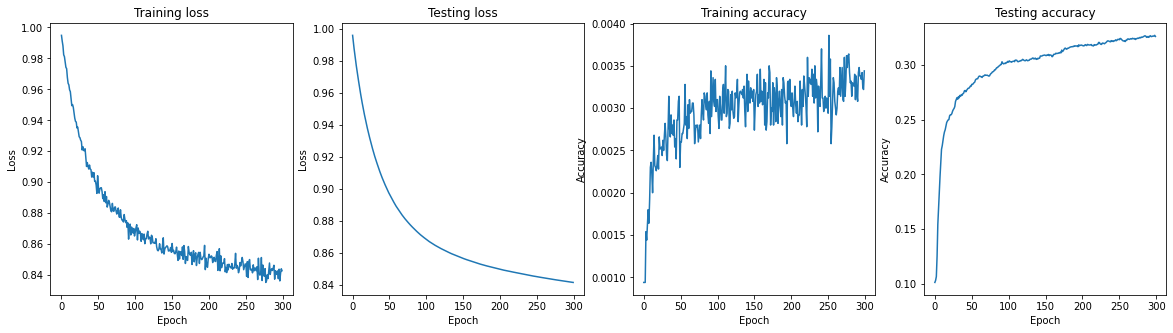

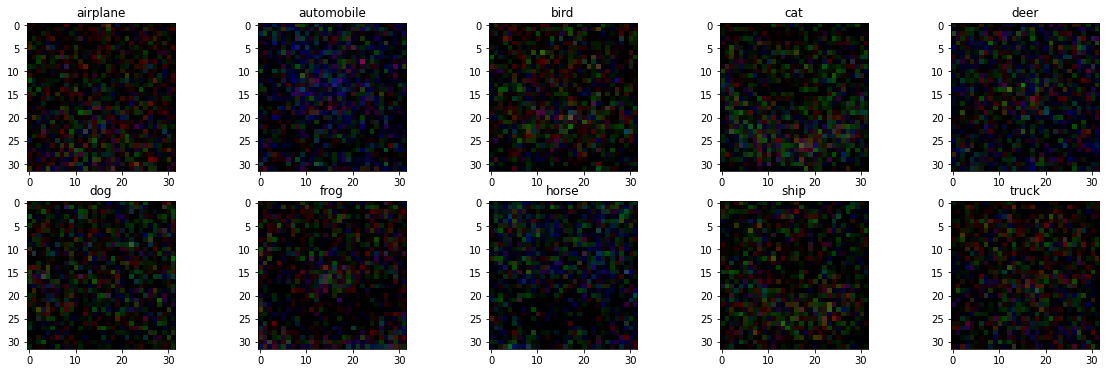

In [36]:
# Plotting losses and accuracies and displaying w as images
fig , ax = plt.subplots(figsize=(20,5 ))
plt.subplot(1,4,1)
plt.plot(train_loss_history)
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(test_loss_history)
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(train_acc_history)
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(val_acc_history)
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
f, axarr = plt.subplots(2,5)
f.set_size_inches(20,6)
for i in range(2):
    for j in range(5):
        img = w1[:, 5*i+j].reshape(32, 32, 3)
        axarr[i,j].imshow(img*1000)
        axarr[i,j].set_title(class_names[5*i+j])
plt.show()



